In [1]:
from apps.twodimensional.advection import advection
from apps.twodimensional.advection.smoothscalarexample import smooth_scalar_example
from pydogpack import main
from pydogpack.tests.utils import utils
from pydogpack.utils import dg_utils
from pydogpack.utils import math_utils
from pydogpack.utils import x_functions
from pydogpack.visualize import plot
from pydogpack.utils import io_utils

import numpy as np
from IPython.display import HTML

import matplotlib.pyplot as plt
import matplotlib.animation as animation

# Smooth Scalar Advection Example

## Cartesian Mesh

In [8]:
wavespeed = np.array([1.0, 1.0])
initial_condition = x_functions.Sine2D()
problem = smooth_scalar_example.SmoothScalarExample(wavespeed, initial_condition)
exact_solution = problem.exact_solution
time_final = 0.5
exact_final_solution = x_functions.FrozenT(exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 2
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order
problem.parameters["time_stepping"]["is_verbose"] = True

x_left = -1.0
x_right = 1.0
y_bottom = -1.0
y_top = 1.0
num_rows = 20
num_cols = 20
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_cartesian"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "legendre_2d_cartesian"
problem.parameters["basis"]["inner_product_constant"] = 0.25
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.5
delta_x = (x_right - x_left) / num_cols
delta_y = (y_top - y_bottom) / num_rows
face_area = max(delta_x, delta_y)
elem_vol = delta_x * delta_y
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [10]:
final_solution = main.run(problem)

> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/utils/dg_utils.py(134)project_flux_onto_gradient()
    133     import ipdb; ipdb.set_trace()
--> 134     def func(x, i):
    135         return flux_function(dg_solution(x, i), x, t)



ipdb>  c


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/basis/basis.py(338)quad_func()
    337                 # \M{f}(\v{b}_i(\v{xi})) (\v{\phi}'(xi) c_i'(x))^T
--> 338                 x = self.canonical_element_.transform_to_mesh(xi, mesh_, i_elem)
    339                 # basis_jacobian.shape (num_basis_cpts, num_dims, points.shape)



ipdb>  xi


array([[-0.57735027, -0.57735027,  0.57735027,  0.57735027],
       [-0.57735027,  0.57735027, -0.57735027,  0.57735027]])


ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/basis/basis.py(340)quad_func()
    339                 # basis_jacobian.shape (num_basis_cpts, num_dims, points.shape)
--> 340                 basis_jacobian = self.jacobian(xi)
    341                 # transformation jacobian, shape (num_dims, num_dims)



ipdb>  print(x)


[[-0.97886751 -0.97886751 -0.92113249 -0.92113249]
 [-0.97886751 -0.92113249 -0.97886751 -0.92113249]]


ipdb>  n


> /Users/caleblogemann/Documents/Education/Graduate/Research/Python/PyDogPack/pydogpack/basis/basis.py(342)quad_func()
    341                 # transformation jacobian, shape (num_dims, num_dims)
--> 342                 c_i_j = self.canonical_element_.transform_to_canonical_jacobian(
    343                     mesh_, i_elem



ipdb>  basis_jacobian


array([[[ 0.        ,  0.        ,  0.        ,  0.        ],
        [ 0.        ,  0.        ,  0.        ,  0.        ]],

       [[-0.        ,  0.        , -0.        ,  0.        ],
        [ 1.73205081,  1.73205081,  1.73205081,  1.73205081]],

       [[ 1.73205081,  1.73205081,  1.73205081,  1.73205081],
        [-0.        , -0.        ,  0.        ,  0.        ]]])


ipdb>  self.basis_function_jacobian


*** AttributeError: 'LegendreBasis2DCartesian' object has no attribute 'basis_function_jacobian'


ipdb>  self.basis_functions_jacobian


[[<function LegendreBasis2DCartesian.get_basis_function_gradient.<locals>.phi_xi at 0x7feace3da5f0>, <function LegendreBasis2DCartesian.get_basis_function_gradient.<locals>.phi_eta at 0x7feace3da4d0>], [<function LegendreBasis2DCartesian.get_basis_function_gradient.<locals>.phi_xi at 0x7feace3cbb00>, <function LegendreBasis2DCartesian.get_basis_function_gradient.<locals>.phi_eta at 0x7feace3cb950>], [<function LegendreBasis2DCartesian.get_basis_function_gradient.<locals>.phi_xi at 0x7feace3cb5f0>, <function LegendreBasis2DCartesian.get_basis_function_gradient.<locals>.phi_eta at 0x7feace3cb3b0>]]


ipdb>  q


BdbQuit: 

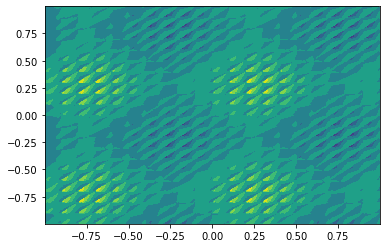

In [7]:
ani, fig = plot.create_animation_output_dir(problem.output_dir);
HTML(ani.to_html5_video())

In [14]:
error = math_utils.compute_error(final_solution, exact_final_solution)

In [10]:
error

0.4565151203379076

In [15]:
error

0.25494033651044834

### Convergence Test

#### DG Convergence

In [82]:
wavespeed = np.array([1.0, 1.0])
initial_condition = x_functions.Sine2D()
problem = smooth_scalar_example.SmoothScalarExample(wavespeed, initial_condition)
exact_solution = problem.exact_solution
time_final = 0.5
exact_final_solution = x_functions.FrozenT(exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["num_frames"] = 20
problem.parameters["time_stepping"]["is_verbose"] = False

x_left = -1.0
x_right = 1.0
y_bottom = -1.0
y_top = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_cartesian"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top


problem.parameters["basis"]["basis_class"] = "legendre_2d_cartesian"
problem.parameters["basis"]["inner_product_constant"] = 0.25

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl_dict = {1: 1.0, 2:0.5, 3:0.3, 4:0.1}

In [83]:
for space_time_order in range(1, 5):
    problem.parameters["basis"]["space_order"] = space_time_order
    problem.parameters["time_stepping"]["order"] = space_time_order
    cfl = cfl_dict[space_time_order]
    error_list = []
    for n in [5, 10]:
        problem.parameters["mesh"]["num_rows"] = n
        problem.parameters["mesh"]["num_cols"] = n
        delta_x = (x_right - x_left) / n
        delta_y = (y_top - y_bottom) / n
        face_area = max(delta_x, delta_y)
        elem_vol = delta_x * delta_y
        delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
        problem.parameters["delta_t"] = delta_t
        
        problem._setup_objects()
        
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(order)
#     if error_list[-1] >= math_utils.MACHINE_ERROR:
#         assert rount(order) >= num_basis_cpts

0.3569735349536191
1.9298666982455528
2.9194635926238157
3.937832308338196


## Unstructured Mesh

In [17]:
wavespeed = np.array([1.0, 1.0])
initial_condition = x_functions.Sine2D()
problem = smooth_scalar_example.SmoothScalarExample(wavespeed, initial_condition)
exact_solution = problem.exact_solution
time_final = 0.5
exact_final_solution = x_functions.FrozenT(exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

space_time_order = 2
problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["num_frames"] = 10
problem.parameters["time_stepping"]["order"] = space_time_order
problem.parameters["time_stepping"]["is_verbose"] = True

x_left = -1.0
x_right = 1.0
y_bottom = -1.0
y_top = 1.0
num_rows = 10
num_cols = 10
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_triangulated_rectangle"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top
problem.parameters["mesh"]["num_rows"] = num_rows
problem.parameters["mesh"]["num_cols"] = num_cols

problem.parameters["basis"]["basis_class"] = "modal_2d_triangle"
problem.parameters["basis"]["inner_product_constant"] = 0.5
problem.parameters["basis"]["space_order"] = space_time_order

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl = 0.5
delta_x = (x_right - x_left) / num_cols
delta_y = (y_top - y_bottom) / num_rows
hypotonuse = np.sqrt(delta_x * delta_x + delta_y * delta_y)
face_area = max(delta_x, delta_y, hypotonuse)
elem_vol = 0.5 * delta_x * delta_y
delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
# delta_t = 0.01
problem.parameters["delta_t"] = delta_t

problem._setup_objects()

In [18]:
final_solution = main.run(problem)

10.0%
Will finish in 0:00:25.999065 at 14:47:58.513988
20.0%
Will finish in 0:00:23.113032 at 14:47:58.517428
30.0%
Will finish in 0:00:20.260917 at 14:47:58.570305
40.0%
Will finish in 0:00:18.624808 at 14:48:00.667485
50.0%
Will finish in 0:00:16.172167 at 14:48:01.970472
60.0%
Will finish in 0:00:13.103279 at 14:48:02.384335
70.0%
Will finish in 0:00:09.736002 at 14:48:02.079478
80.0%
Will finish in 0:00:06.437598 at 14:48:01.814128
90.0%
Will finish in 0:00:03.202664 at 14:48:01.652776
100.0%
Will finish in 0:00:00 at 14:48:01.455678


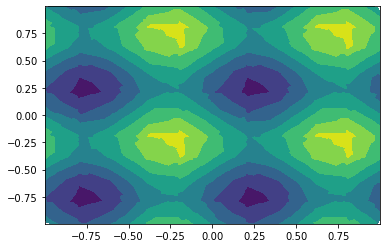

In [19]:
ani, fig = plot.create_animation_output_dir(problem.output_dir);
HTML(ani.to_html5_video())

In [13]:
error = math_utils.compute_error(final_solution, exact_final_solution)
error

0.30384900373784324

### Convergence Test 

In [20]:
wavespeed = np.array([1.0, 1.0])
initial_condition = x_functions.Sine2D()
problem = smooth_scalar_example.SmoothScalarExample(wavespeed, initial_condition)
exact_solution = problem.exact_solution
time_final = 0.5
exact_final_solution = x_functions.FrozenT(exact_solution, time_final)
problem.parameters["time_final"] = time_final
problem.parameters["is_weak"] = True

problem.parameters["time_stepping"]["time_stepping_class"] = "explicit_runge_kutta"
problem.parameters["time_stepping"]["num_frames"] = 20
problem.parameters["time_stepping"]["is_verbose"] = False

x_left = -1.0
x_right = 1.0
y_bottom = -1.0
y_top = 1.0
problem.parameters["mesh"]["mesh_class"] = "mesh_2d_triangulated_rectangle"
problem.parameters["mesh"]["x_left"] = x_left
problem.parameters["mesh"]["x_right"] = x_right
problem.parameters["mesh"]["y_bottom"] = y_bottom
problem.parameters["mesh"]["y_top"] = y_top


problem.parameters["basis"]["basis_class"] = "modal_2d_triangle"
problem.parameters["basis"]["inner_product_constant"] = 0.5

problem.parameters["boundary_condition"]["boundary_condition_class"] = "dirichlet"
problem.parameters["riemann_solver"]["riemann_solver_class"] = "local_lax_friedrichs"

cfl_dict = {1: 1.0, 2:0.5, 3:0.3, 4:0.1}

In [22]:
for space_time_order in range(1, 5):
    problem.parameters["basis"]["space_order"] = space_time_order
    problem.parameters["time_stepping"]["order"] = space_time_order
    cfl = cfl_dict[space_time_order]
    error_list = []
    for n in [5, 10]:
        problem.parameters["mesh"]["num_rows"] = n
        problem.parameters["mesh"]["num_cols"] = n
        delta_x = (x_right - x_left) / n
        delta_y = (y_top - y_bottom) / n
        hypotonuse = np.sqrt(delta_x * delta_x + delta_y * delta_y)
        face_area = max(delta_x, delta_y, hypotonuse)
        elem_vol = 0.5 * delta_x * delta_y
        delta_t = float(dg_utils.get_delta_t(cfl, problem.max_wavespeed, face_area, elem_vol))
        problem.parameters["delta_t"] = delta_t
        
        problem._setup_objects()
        
        final_solution = main.run(problem)
        error = math_utils.compute_error(final_solution, exact_final_solution)
        error_list.append(error)
    order = utils.convergence_order(error_list)
    print(order)
#     if error_list[-1] >= math_utils.MACHINE_ERROR:
#         assert rount(order) >= num_basis_cpts

0.6322640151957628
1.8694424297034984
2.919617056206774
3.9302808773874287


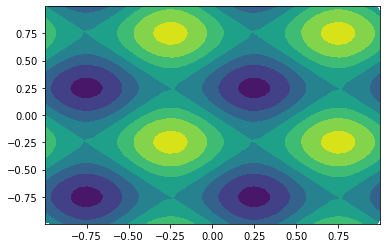

In [23]:
ani, fig = plot.create_animation_output_dir(problem.output_dir);
HTML(ani.to_html5_video())